In [24]:
import numpy as np
from matplotlib import pyplot as pl

%matplotlib inline

In [29]:
def ftcs (u0, alpha, dt, dx, dy, nt, qx = 0.0, qy = 0.0):
    u = u0.copy()
    sigmax = alpha * dt / dx**2
    sigmay = alpha * dt / dy**2
    nx, ny = u.shape
    I, J = nx // 2, ny // 2
    for n in range(nt):
        u[1:-1, 1:-1] = (u[1:-1, 1:-1] 
                         + sigmax * (u[1:-1, :-2] - 2 * u[1:-1, 1:-1] + u[1:-1, 2:])
                         + sigmay * (u[:-2, 1:-1] - 2 * u[1:-1, 1:-1] + u[2:, 1:-1]))

        u[:,-1] = u[:,-2] + qx*dx
        u[-1,:] = u[-2,:] + qy*dy
        if u[J, I] >= 70.0:
            break
    print(n+1, u[J, I]) 
    return u

In [30]:
L = 0.01
nx = 21
ny = 21
dx = L/(nx-1)
dy = L/(ny-1)

x = np.linspace(0.0, L, num = nx)
y = np.linspace(0.0, L, num = ny)

alpha = 1e-4

T0 = np.full((nx,ny), 20.0)
T0[0,:] = 100.0
T0[:,0] = 100.0


In [31]:
nt = 500
sigmax = 1/4
sigmay = 1/4

dt = sigmax * dx **2 / alpha

T = ftcs(T0, alpha, dt, dx, dy, nt)


256 70.02138294076661


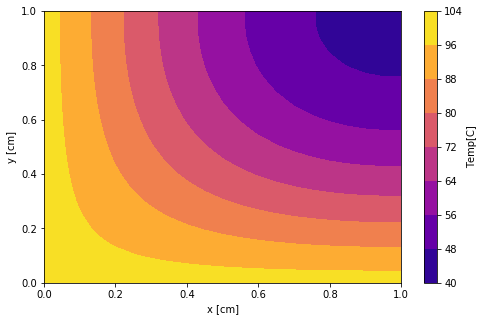

In [32]:
pl.figure(figsize=(8.0, 5.0))
pl.xlabel('x [cm]')
pl.ylabel('y [cm]')
contf = pl.contourf(x * 100, y * 100, T, cmap='plasma' );
cbar = pl.colorbar(contf)
cbar.set_label('Temp[C]')